# Importing libraries and defining classes and functions

Welcome to $B, \tau, \nu$ Analysis.

This notebook is developed in order to make an Analysis for MC simulations for final state $b_{jet}, \tau_h, p_T^{miss}$. 
In this first section a user only must care about giving the path direction for storing the histograms and de DataFrames in a .csv format.

The path is declared in the first line of the second code cell, just before the `RootTreeReader`.

Once the user had made that, the resulting files will be uploaded in the path.

In [1]:
!pip install uproot
!pip install awkward
!pip install mplhep

     |████████████████████████████████| 298 kB 7.2 MB/s 
     |████████████████████████████████| 11.7 MB 4.7 MB/s 
     |████████████████████████████████| 5.8 MB 7.9 MB/s 
     |████████████████████████████████| 11.2 MB 37.1 MB/s 
     |████████████████████████████████| 899 kB 47.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


# **Por favor dele restart runtime justo arriba, gracias**

# **Ahora sí, prosiga**

In [1]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libxext-dev is already the newest version (2:1.3.3-1).
libxext-dev set to manually installed.
libxft-dev is already the newest version (2.3.2-1).
cmake is already the newest version (3.10.2-1ubuntu2.18.04.2).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.3).
dpkg-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
gfortran is already the newest version (4:7.4.0-1ubuntu2.3).
git is already the newest version (1:2.17.1-1ubuntu0.9).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.4).
libx11-dev set to manually installed.
The following additional packages will be installed:
  binutils-common binutils-x86-64-linux-gnu libapr1 libaprutil1 libbinutils
  libserf-1-1 libsvn1
Suggested packages:
  binutils-doc db5.3-util libapache

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!tar -xf /content/drive/Shareddrives/PyROOT_in_Google/root_build_google_yikes.tar

In [4]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20  2018 root_build
drwxr-xr-x  1 root root 4.0K Mar 23 14:22 sample_data
drwx------  6 root root 4.0K Mar 25 16:01 drive


In [5]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [6]:
#Coping an script were are all the functions needed for the analysis in the colaboratory content
!cp /content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Processor.py /content

In [7]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import awkward
import mplhep as hep
import Processor as pr
hep.style.use("CMS")

Welcome to JupyROOT 6.14/04


In [8]:
#Loading signals and backgrounds
Df_s1 = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/EFT_epslcb.csv", index_col="Unnamed: 0")
Df_s2 = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/EFT_epsslcb.csv", index_col="Unnamed: 0")
Df_s3 = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/EFT_epstcb.csv", index_col="Unnamed: 0")
Df_bg_wj = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/W_plus_jets.csv", index_col="Unnamed: 0")
Df_bg_zj = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Z_plus_jets.csv", index_col="Unnamed: 0")
Df_bg_ttbar = pd.read_csv("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/tt_bar.csv", index_col="Unnamed: 0")

# Roots

In this section the `.root` files to be read are selected. The files are divided into signals, and 3 different background types, produced in order to have the maximun probbility to have a $b_{jet}, \tau$ and $p_t^{miss}$ in the final state.

The first cell declares the paths to the files, and the second and the thirdone read those paths for signals and background, and turn them into pandas DataFrames.

# Selecting the $b_{jet}$ and the $\tau_h$ per event

Here the selection is made. The criteria is to find the events that have at least one jet tagged as a $\tau$, and another one tagged as a $b$. The information of those two jets are storaged in another dataframe with the information of the $p_T^{miss}$ per event.

The selection is made sepparately for each signal and for each background.

The first cell makes this selection. The second saves the Dataframes into `.csv` files. The third one can read these files.

The fourth cell declares the cross section of the process starting for the signal and then the backgrounds. These cross section must be declared in order $s_1, s_2, s_3, t\bar{t}, W + jets, Z + jets$. The labels in the sixth cell, which are the name for the events must be declared in that same order.

In [9]:
Luminosity = 150

sigma = np.array([0.13, 0.08, 0.71, (5.046960e+02), (0.642517126417),(0.025330271375)])*1e-12
#Number of events expected per process
n_ev = sigma * Luminosity /(1e-15)

#Number of montecarlo events analyzed
n_mc = np.array([100000,100000,100000, 
                 24307250, 350495, 106191])
#Weights 
w = n_ev / n_mc
ex_ev_s = pd.Series(data = w,
                    index = ['eps_l = 1', 'eps_s = 1', 'eps_t = 1', 'Bg_TTbar', 'Bg_WJ', 'Bg_ZJ'])



print(ex_ev_s)

eps_l = 1    0.195000
eps_s = 1    0.120000
eps_t = 1    1.065000
Bg_TTbar     3.114478
Bg_WJ        0.274976
Bg_ZJ        0.035780
dtype: float64


In [10]:
#Lables for the plotting
labels = [r"EFT$\epsilon_l = 1$",
          r"EFT$\epsilon_s = 1$", 
          r"EFT$\epsilon_t = 1$", 
          r"$t\,\bar{t}$c",
          r"W + jets",
          r"Z + jets"]

ind = ['eps_l = 1', 'eps_s = 1', 'eps_t = 1', 'Bg_TTbar', 'Bg_WJ', 'Bg_ZJ']

# Straight cuts and Significance

In this section the best cuts for maximizing the statistical significance is made. Three variables are considered in this analysis.

1. $p_T(\tau)$
2. $\Delta\phi(\tau,p_T^{miss})$
3. $p_T^{miss}$

In [11]:
#N0_mc = n_mc.copy()
N0_mc = pd.Series(n_mc.copy(),
                  index = ind)
N0_mc

eps_l = 1      100000
eps_s = 1      100000
eps_t = 1      100000
Bg_TTbar     24307250
Bg_WJ          350495
Bg_ZJ          106191
dtype: int64

In [12]:
#Initial cults
Df_s1 = pr.final_cuts(Df_s1, pt_tau=25, pt_b=20, del_phi = 0, met = 0)
Df_s2 = pr.final_cuts(Df_s2, pt_tau=25, pt_b=20, del_phi = 0, met = 0)
Df_s3 = pr.final_cuts(Df_s3, pt_tau=25, pt_b=20, del_phi = 0, met = 0)
Df_bg_wj = pr.final_cuts(Df_bg_wj, pt_tau=25, pt_b=20, del_phi = 0, met = 0)
Df_bg_zj = pr.final_cuts(Df_bg_zj, pt_tau=25, pt_b=20, del_phi = 0, met = 0)
Df_bg_ttbar = pr.final_cuts(Df_bg_ttbar, pt_tau=25, pt_b=20, del_phi = 0, met = 0)

Nn_mc = pd.Series([Df_s1.shape[0],
                   Df_s2.shape[0],
                   Df_s3.shape[0],
                   Df_bg_ttbar.shape[0],
                   Df_bg_wj.shape[0],
                   Df_bg_zj.shape[0]], index = ind)

In [13]:
#Eficiency for requiring at least a tau an a b in the final state
Nn_mc / N0_mc

eps_l = 1    0.094670
eps_s = 1    0.089150
eps_t = 1    0.119740
Bg_TTbar     0.058295
Bg_WJ        0.045170
Bg_ZJ        0.044655
dtype: float64

In [14]:
#Number of Montecarlo events by now
No_mc = pd.Series([Df_s1.shape[0],
                   Df_s2.shape[0],
                   Df_s3.shape[0],
                   Df_bg_ttbar.shape[0],
                   Df_bg_wj.shape[0],
                   Df_bg_zj.shape[0]], index = ind)


#requiring only one b-jet per event
Df_s1_cut = pr.final_cuts(Df_s1, pt_tau=25, pt_b=0, del_phi = 0, met = 0)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau=25, pt_b=0, del_phi = 0, met = 0)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau=25, pt_b=0, del_phi = 0, met = 0)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau=25, pt_b=0, del_phi = 0, met = 0)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau=25, pt_b=0, del_phi = 0, met = 0)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau=25, pt_b=0, del_phi = 0, met = 0)

Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]



Nn_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

In [15]:
#Eficiency of requiring only one b in the final state
Nn_mc / No_mc

eps_l = 1    0.872399
eps_s = 1    0.876949
eps_t = 1    0.882245
Bg_TTbar     0.525431
Bg_WJ        0.823459
Bg_ZJ        0.900675
dtype: float64

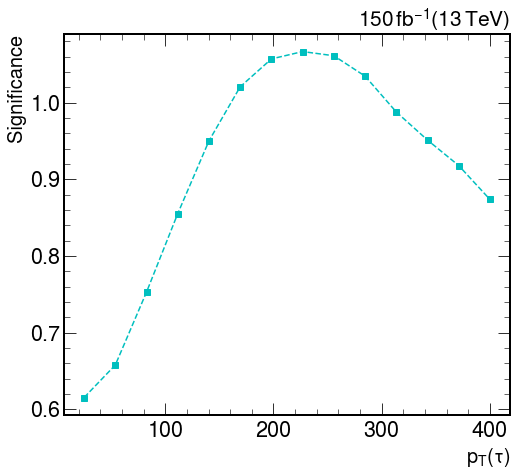

In [ ]:
#Ploting tau cuts Significance
pr.plot_significances(s = Df_s2_cut, 
                      b1 = Df_bgttbar_cut,
                      b2 = Df_bgw_cut,
                      b3 = Df_bgz_cut,
                      var = pr.pt_tau_cut,
                      w = [ex_ev_s[1]] + list(ex_ev_s[3:]),
                      rango = [25, 400, 14], 
                      txt = r'p_T(\tau)');


In [ ]:
#Applying tau's pt cut
opt = 200

No_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

Df_s1_cut = pr.final_cuts(Df_s1, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau = opt, pt_b=0, del_phi = 0, met = 0)


Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]

Nn_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)


In [ ]:
#Eficiency of the tau cut
Nn_mc / No_mc


eps_l = 1    0.192880
eps_s = 1    0.266564
eps_t = 1    0.160261
Bg_TTbar     0.023996
Bg_WJ        0.059063
Bg_ZJ        0.482557
dtype: float64

In [ ]:
opt = 200
omet = 0

No_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

Df_s1_cut = pr.final_cuts(Df_s1, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau = opt, pt_b=20, del_phi = 0, met = omet)

Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]


Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.electron_pT < 15) | ((Df_bgz_cut.electron_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.electron_pT < 15) | ((Df_bgw_cut.electron_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.electron_pT < 15) | ((Df_bgttbar_cut.electron_pT.isna()))]

Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.muon_pT < 15) | ((Df_bgz_cut.muon_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.muon_pT < 15)     | ((Df_bgw_cut.muon_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.muon_pT < 15) | ((Df_bgttbar_cut.muon_pT.isna()))]


Df_s1_cut = Df_s1_cut[(Df_s1_cut.electron_pT < 15) | ((Df_s1_cut.electron_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.electron_pT < 15) | ((Df_s2_cut.electron_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.electron_pT < 15) | ((Df_s3_cut.electron_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.muon_pT < 15) | ((Df_s1_cut.muon_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.muon_pT < 15) | ((Df_s2_cut.muon_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.muon_pT < 15) | ((Df_s3_cut.muon_pT.isna()))]

Nn_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

In [ ]:
#Efficiency e/mu Veto cut
Nn_mc /No_mc

eps_l = 1    0.994978
eps_s = 1    0.997601
eps_t = 1    0.995865
Bg_TTbar     0.834042
Bg_WJ        0.967532
Bg_ZJ        0.766133
dtype: float64

/content/Processor.py:515: RuntimeWarning: invalid value encountered in double_scalars
  for i in arr_range])


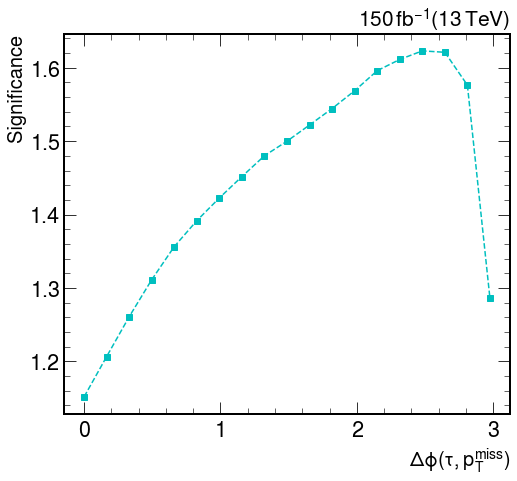

In [ ]:
pr.plot_significances(s = Df_s2_cut, 
                      b1 = Df_bgttbar_cut,
                      b2 = Df_bgw_cut,
                      b3 = Df_bgz_cut,
                      var = pr.phi_tau_cut,
                      w = [ex_ev_s[1]] + list(ex_ev_s[3:]),
                      rango = [0, np.pi, 20],
                      txt = r"\Delta\phi(\tau,p_T^{miss})");
#plt.xlabel(r'$\Delta\phi(\tau,p_T^{miss})$');

In [ ]:
opt = 200
odp = 2

No_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)
Df_s1_cut = pr.final_cuts(Df_s1, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau = opt, pt_b=20, del_phi = odp, met = 0)


Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]


Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.electron_pT < 15) | ((Df_bgz_cut.electron_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.electron_pT < 15) | ((Df_bgw_cut.electron_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.electron_pT < 15) | ((Df_bgttbar_cut.electron_pT.isna()))]

Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.muon_pT < 15) | ((Df_bgz_cut.muon_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.muon_pT < 15)     | ((Df_bgw_cut.muon_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.muon_pT < 15) | ((Df_bgttbar_cut.muon_pT.isna()))]


Df_s1_cut = Df_s1_cut[(Df_s1_cut.electron_pT < 15) | ((Df_s1_cut.electron_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.electron_pT < 15) | ((Df_s2_cut.electron_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.electron_pT < 15) | ((Df_s3_cut.electron_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.muon_pT < 15) | ((Df_s1_cut.muon_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.muon_pT < 15) | ((Df_s2_cut.muon_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.muon_pT < 15) | ((Df_s3_cut.muon_pT.isna()))]

N_ttbar2 = Df_bgttbar_cut.shape[0]
N_wpj2 = Df_bgw_cut.shape[0]
N_zpj2 = Df_bgz_cut.shape[0]

Nn_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

In [ ]:
#Efficiency delta phi cut
Nn_mc / No_mc

eps_l = 1    0.891483
eps_s = 1    0.927850
eps_t = 1    0.740214
Bg_TTbar     0.460439
Bg_WJ        0.386577
Bg_ZJ        0.568081
dtype: float64

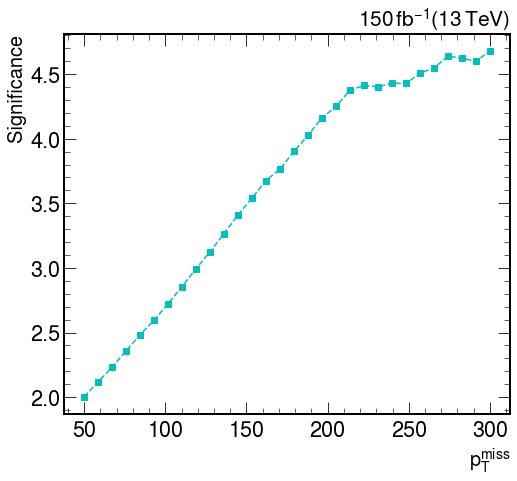

In [ ]:
pr.plot_significances(s = Df_s2_cut, 
                      b1 = Df_bgttbar_cut,
                      b2 = Df_bgw_cut,
                      b3 = Df_bgz_cut,
                      var = pr.et_met_cut,
                      w = [ex_ev_s[1]] + list(ex_ev_s[3:]),
                      rango = [50, 300, 30],
                      txt = r"p_T^{miss}")
#plt.xlabel(r'$p_T^{miss}$');

In [16]:
opt = 200
odp = 2
omet = 200
No_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)

Df_s1_cut = pr.final_cuts(Df_s1, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)


Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]


Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.electron_pT < 15) | ((Df_bgz_cut.electron_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.electron_pT < 15) | ((Df_bgw_cut.electron_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.electron_pT < 15) | ((Df_bgttbar_cut.electron_pT.isna()))]

Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.muon_pT < 15) | ((Df_bgz_cut.muon_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.muon_pT < 15)     | ((Df_bgw_cut.muon_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.muon_pT < 15) | ((Df_bgttbar_cut.muon_pT.isna()))]


Df_s1_cut = Df_s1_cut[(Df_s1_cut.electron_pT < 15) | ((Df_s1_cut.electron_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.electron_pT < 15) | ((Df_s2_cut.electron_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.electron_pT < 15) | ((Df_s3_cut.electron_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.muon_pT < 15) | ((Df_s1_cut.muon_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.muon_pT < 15) | ((Df_s2_cut.muon_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.muon_pT < 15) | ((Df_s3_cut.muon_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.tau2_pT < 50) | ((Df_s1_cut.tau2_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.tau2_pT < 50) | ((Df_s2_cut.tau2_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.tau2_pT < 50) | ((Df_s3_cut.tau2_pT.isna()))]

Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.tau2_pT < 50) | ((Df_bgw_cut.tau2_pT.isna()))]
Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.tau2_pT < 50) | ((Df_bgz_cut.tau2_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.tau2_pT < 50) | ((Df_bgttbar_cut.tau2_pT.isna()))]

Df_s1_cut = Df_s1_cut[(np.abs(Df_s1_cut.tau2_eta) > 2.3) | ((Df_s1_cut.tau2_eta.isna()))]
Df_s2_cut = Df_s2_cut[(np.abs(Df_s2_cut.tau2_eta) > 2.3) | ((Df_s2_cut.tau2_eta.isna()))]
Df_s3_cut = Df_s3_cut[(np.abs(Df_s3_cut.tau2_eta) > 2.3) | ((Df_s3_cut.tau2_eta.isna()))]

Df_bgw_cut = Df_bgw_cut[(np.abs(Df_bgw_cut.tau2_eta) > 2.3) | ((Df_bgw_cut.tau2_eta.isna()))]
Df_bgz_cut = Df_bgz_cut[(np.abs(Df_bgz_cut.tau2_eta) > 2.3) | ((Df_bgz_cut.tau2_eta.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(np.abs(Df_bgttbar_cut.tau2_eta) > 2.3) | ((Df_bgttbar_cut.tau2_eta.isna()))]

Nn_mc = pd.Series([Df_s1_cut.shape[0],
                   Df_s2_cut.shape[0],
                   Df_s3_cut.shape[0],
                   Df_bgttbar_cut.shape[0],
                   Df_bgw_cut.shape[0],
                   Df_bgz_cut.shape[0]], index = ind)


df = pd.DataFrame(ex_ev_s, columns = ["expected_events"])
df['First_Selection'] = np.array([Df_s1.shape[0], Df_s2.shape[0], Df_s3.shape[0],
                                  Df_bg_ttbar.shape[0], Df_bg_wj.shape[0], Df_bg_zj.shape[0]]) #* ex_ev_s
df['Second_Selection'] = np.array([Df_s1_cut.shape[0], Df_s2_cut.shape[0], Df_s3_cut.shape[0], 
                                   Df_bgttbar_cut.shape[0], Df_bgw_cut.shape[0], Df_bgz_cut.shape[0]]) #* ex_ev_s
df

,expected_events,First_Selection,Second_Selection
eps_l = 1,0.195000,9467,1020
eps_s = 1,0.120000,8915,1508
eps_t = 1,1.065000,11974,793
Bg_TTbar,3.114478,1417003,464
Bg_WJ,0.274976,15832,155
Bg_ZJ,0.035780,4742,103


In [17]:
#Met Efficiency
Nn_mc / No_mc

eps_l = 1    0.123502
eps_s = 1    0.192888
eps_t = 1    0.075066
Bg_TTbar     0.000623
Bg_WJ        0.011889
Bg_ZJ        0.024116
dtype: float64

In [18]:
df = pd.DataFrame(ex_ev_s, columns = ["expected_events"])
df['First_Selection'] = np.array([Df_s1.shape[0], Df_s2.shape[0], Df_s3.shape[0],
                                  Df_bg_ttbar.shape[0], Df_bg_wj.shape[0], Df_bg_zj.shape[0]]) * ex_ev_s
df['Second_Selection'] = np.array([Df_s1_cut.shape[0], Df_s2_cut.shape[0], Df_s3_cut.shape[0], 
                                   Df_bgttbar_cut.shape[0], Df_bgw_cut.shape[0], Df_bgz_cut.shape[0]]) * ex_ev_s 
df

,expected_events,First_Selection,Second_Selection
eps_l = 1,0.195000,1.846065e+03,198.900000
eps_s = 1,0.120000,1.069800e+03,180.960000
eps_t = 1,1.065000,1.275231e+04,844.545000
Bg_TTbar,3.114478,4.413225e+06,1445.117880
Bg_WJ,0.274976,4.353414e+03,42.621216
Bg_ZJ,0.035780,1.696700e+02,3.685366


# Plotting and Results

The plots cells are:
1. Plots for the first 3 jets kinematic variables.
2. Plots for the Met variables before the selection.
3. Plots for the Met variables after the selection.
4. Plots for the kinematic variables of $\tau_h$ and $b_{jet}$.
5. Mass spectras.

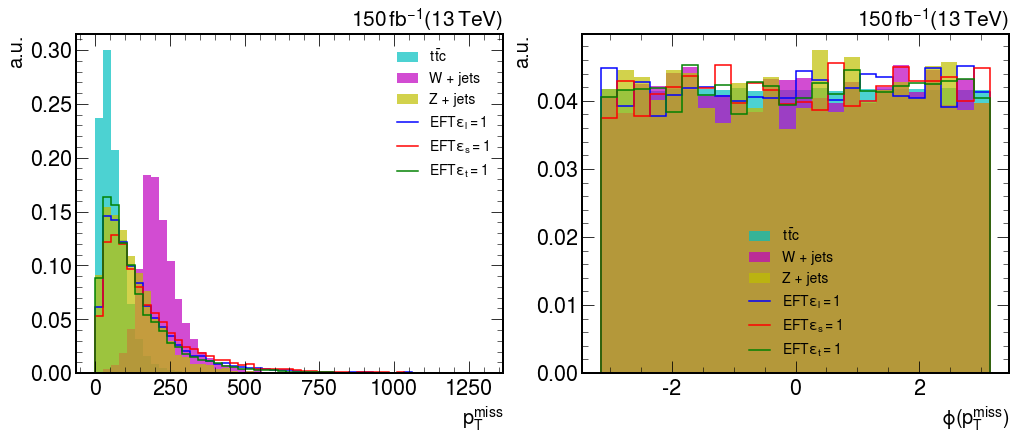

In [ ]:
pr.plot_Met_ET_Phi2(df1 = Df_s1, 
                    df2 = Df_s2, 
                    df3 = Df_s3, 
                    bg2 = Df_bg_wj, 
                    bg3 = Df_bg_zj, 
                    bg1 = Df_bg_ttbar,
                    size = 14,
                    labels = labels)


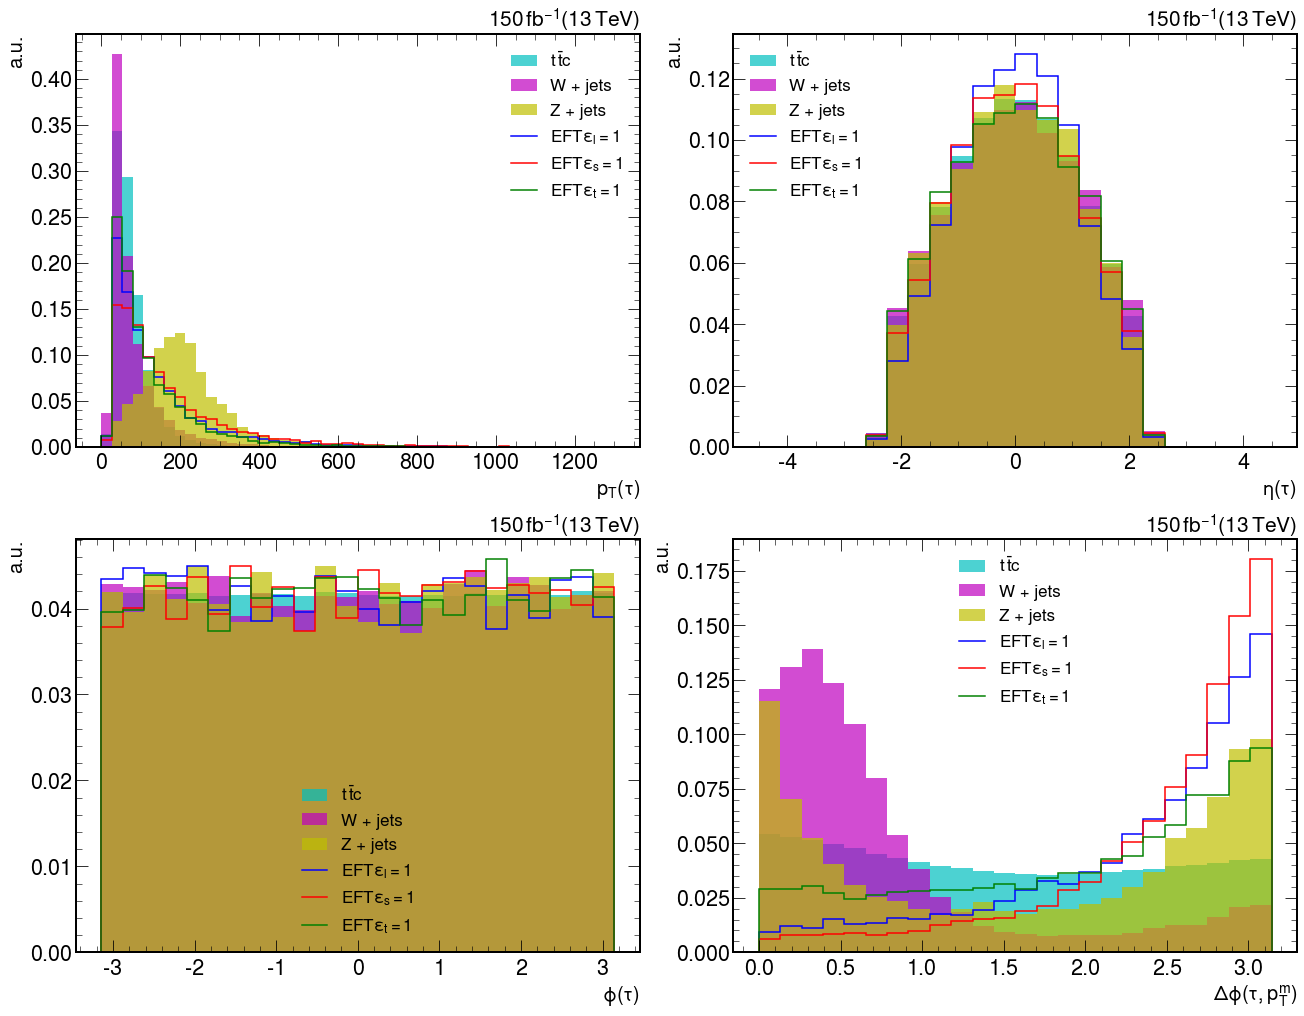

In [ ]:
#Pt Eta phi and delta phi with met for the tau
pr.plot_pt_eta_phi2(labels= labels,
                    obj = "tau1", 
                    df1 = Df_s1, 
                    df2 = Df_s2, 
                    df3 = Df_s3,
                    bg2 = Df_bg_wj, 
                    bg3 = Df_bg_zj, 
                    bg1 = Df_bg_ttbar,
                    size = 17)

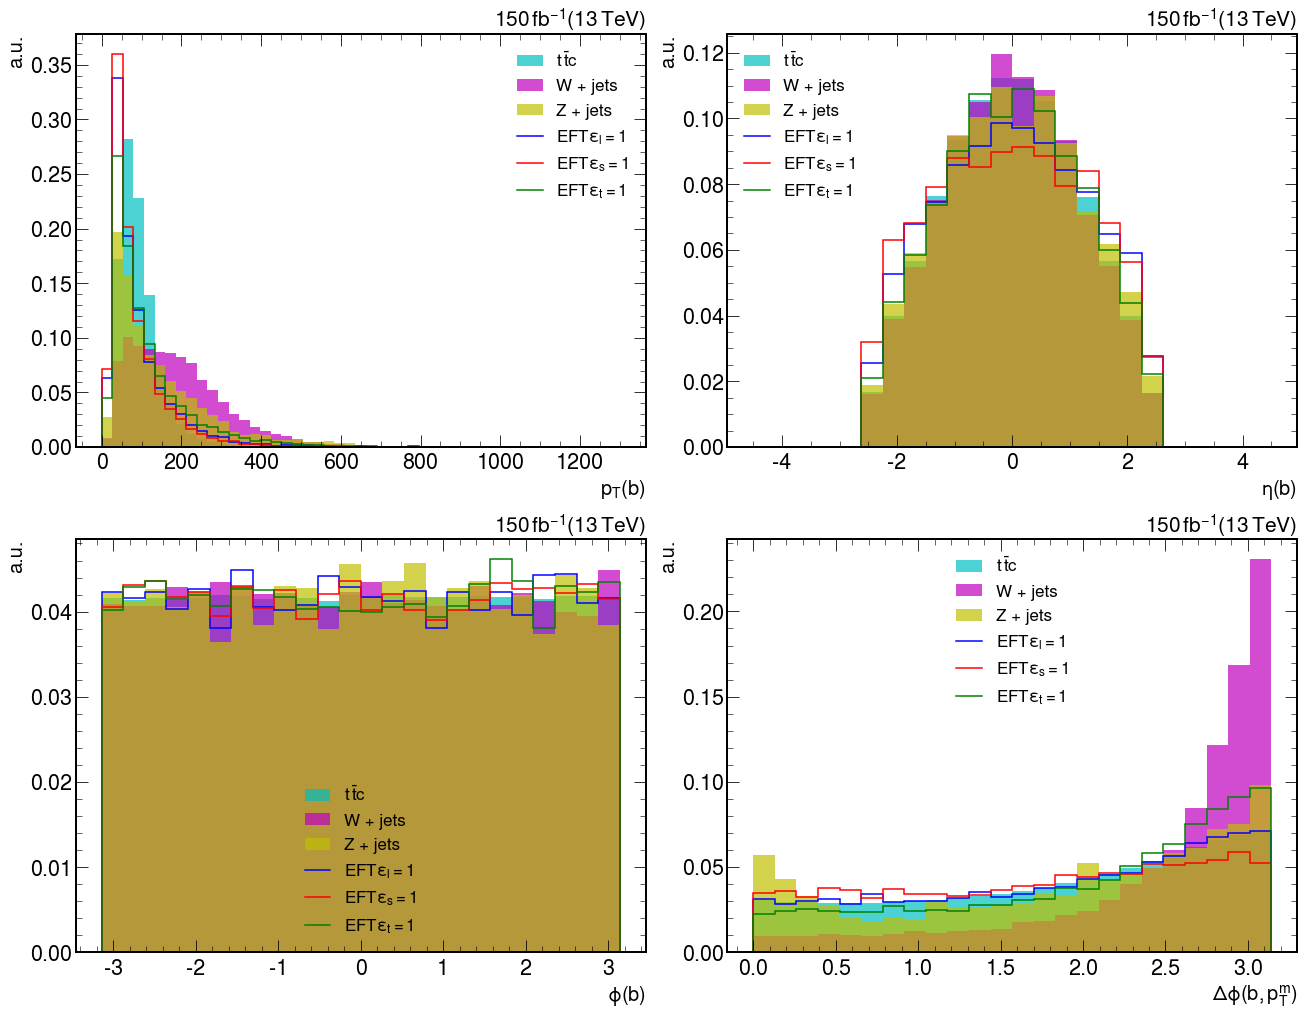

In [ ]:
#Pt Eta phi and delta phi with met for the b
pr.plot_pt_eta_phi2(labels= labels,
                    obj = "b", 
                    df1 = Df_s1, 
                    df2 = Df_s2, 
                    df3 = Df_s3,
                    bg2 = Df_bg_wj, 
                    bg3 = Df_bg_zj, 
                    bg1 = Df_bg_ttbar,
                    size = 17)

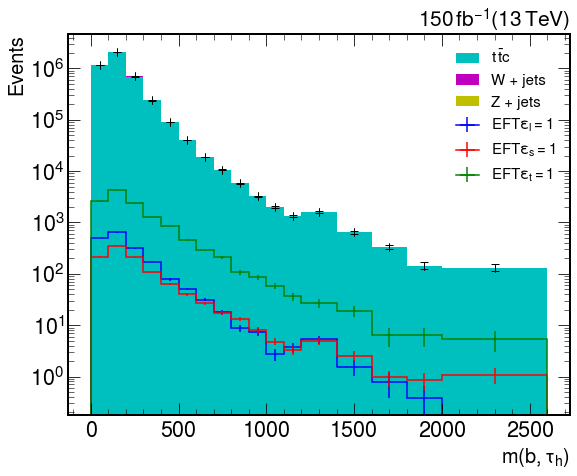

In [19]:
#Invariant Mass between tau, b without cuts
m_tau_b1 = pr.generate_ploteable_invariant_masses(Df_s1,Df_s2, Df_s3)
m_tau_bg = pr.generate_ploteable_invariant_masses(Df_bg_ttbar, Df_bg_wj, Df_bg_zj)
Df_s1['Invariant_mass_tau_b'], Df_s2['Invariant_mass_tau_b'], Df_s3['Invariant_mass_tau_b'] = m_tau_b1
Df_bg_ttbar['Invariant_mass_tau_b'], Df_bg_wj['Invariant_mass_tau_b'], Df_bg_zj['Invariant_mass_tau_b'] = m_tau_bg

pr.plot_mass1(m_type = r'$m(b,\tau_h)$',
              s1 = Df_s1['Invariant_mass_tau_b'],
              s2 = Df_s2['Invariant_mass_tau_b'],
              s3 = Df_s3['Invariant_mass_tau_b'],
              bg1 = Df_bg_ttbar['Invariant_mass_tau_b'],
              bg2 = Df_bg_wj['Invariant_mass_tau_b'],
              bg3 = Df_bg_zj['Invariant_mass_tau_b'],
              Ws = df.First_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])

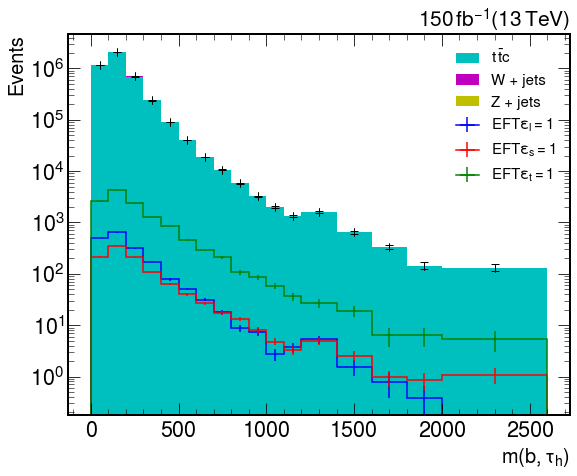

In [20]:
#Invariant Mass between tau, b without cuts
m_tau_b1 = pr.generate_ploteable_invariant_masses(Df_s1,Df_s2, Df_s3)
m_tau_bg = pr.generate_ploteable_invariant_masses(Df_bg_ttbar, Df_bg_wj, Df_bg_zj)
Df_s1['Invariant_mass_tau_b'], Df_s2['Invariant_mass_tau_b'], Df_s3['Invariant_mass_tau_b'] = m_tau_b1
Df_bg_ttbar['Invariant_mass_tau_b'], Df_bg_wj['Invariant_mass_tau_b'], Df_bg_zj['Invariant_mass_tau_b'] = m_tau_bg

pr.plot_mass1(m_type = r'$m(b,\tau_h)$',
              s1 = Df_s1['Invariant_mass_tau_b'],
              s2 = Df_s2['Invariant_mass_tau_b'],
              s3 = Df_s3['Invariant_mass_tau_b'],
              bg1 = Df_bg_ttbar['Invariant_mass_tau_b'],
              bg2 = Df_bg_wj['Invariant_mass_tau_b'],
              bg3 = Df_bg_zj['Invariant_mass_tau_b'],
              Ws = df.First_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])
            


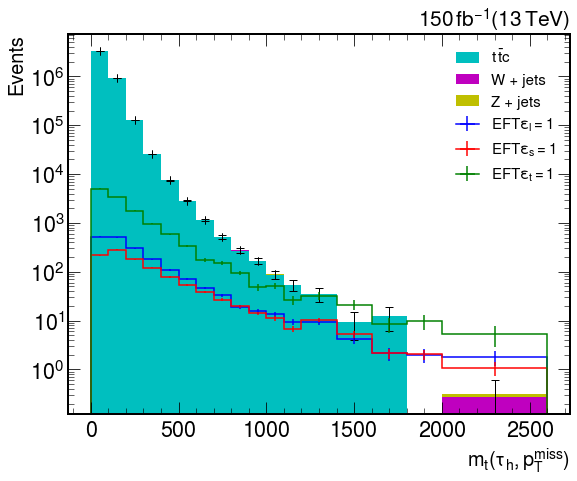

In [21]:
#Transverse mass of tau without cuts
m_trvs_tau_nu1 = pr.generate_ploteable_tr_tau_nu_masses(Df_s1,Df_s2, Df_s3)
m_trvs_tau_nu2 = pr.generate_ploteable_tr_tau_nu_masses(Df_bg_ttbar, Df_bg_wj,Df_bg_zj)
Df_s1['Transverse_mass_tau'], Df_s2['Transverse_mass_tau'], Df_s3['Transverse_mass_tau'] = m_trvs_tau_nu1
Df_bg_ttbar['Transverse_mass_tau'], Df_bg_wj['Transverse_mass_tau'], Df_bg_zj['Transverse_mass_tau'] = m_trvs_tau_nu2

pr.plot_mass1(m_type = r'$m_t(\tau_h, p_T^{miss})$',
              s1 = Df_s1['Transverse_mass_tau'],
              s2 = Df_s2['Transverse_mass_tau'],
              s3 = Df_s3['Transverse_mass_tau'],
              bg1 = Df_bg_ttbar['Transverse_mass_tau'],
              bg2 = Df_bg_wj['Transverse_mass_tau'],
              bg3 = Df_bg_zj['Transverse_mass_tau'],
              Ws = df.First_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])


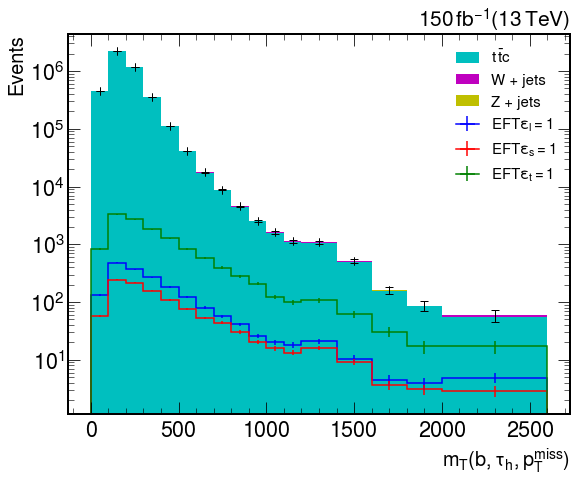

In [22]:
#Total mass between b tau nu without cuts
m_T1 = pr.generate_ploteable_total_masses(Df_s1, Df_s2, Df_s3)
m_Tbg = pr.generate_ploteable_total_masses(Df_bg_ttbar, Df_bg_wj, Df_bg_zj)
Df_s1['Total_mass'], Df_s2['Total_mass'], Df_s3['Total_mass'] = m_T1
Df_bg_ttbar['Total_mass'], Df_bg_wj['Total_mass'], Df_bg_zj['Total_mass'] = m_Tbg


pr.plot_mass1(m_type = r'$m_T(b,\tau_h, p_T^{miss})$',
              s1 = Df_s1['Total_mass'],
              s2 = Df_s2['Total_mass'],
              s3 = Df_s3['Total_mass'],
              bg1 = Df_bg_ttbar['Total_mass'],
              bg2 = Df_bg_wj['Total_mass'],
              bg3 = Df_bg_zj['Total_mass'],
              Ws = df.First_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])

In [25]:
opt = 200
odp = 2
omet = 200

#opt = 80
#odp = 2.4
#omet = 140

Df_s1_cut = pr.final_cuts(Df_s1, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_s2_cut = pr.final_cuts(Df_s2, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_s3_cut = pr.final_cuts(Df_s3, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgw_cut = pr.final_cuts(Df_bg_wj, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgz_cut = pr.final_cuts(Df_bg_zj, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)
Df_bgttbar_cut = pr.final_cuts(Df_bg_ttbar, pt_tau = opt, pt_b=20, del_phi = odp, met = omet)


Df_bgttbar_cut = Df_bgttbar_cut[Df_bgttbar_cut.num_b == 1]
Df_bgz_cut = Df_bgz_cut[Df_bgz_cut.num_b == 1]
Df_bgw_cut = Df_bgw_cut[Df_bgw_cut.num_b == 1]
Df_s1_cut = Df_s1_cut[Df_s1_cut.num_b == 1]
Df_s2_cut = Df_s2_cut[Df_s2_cut.num_b == 1]
Df_s3_cut = Df_s3_cut[Df_s3_cut.num_b == 1]


Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.electron_pT < 15) | ((Df_bgz_cut.electron_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.electron_pT < 15) | ((Df_bgw_cut.electron_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.electron_pT < 15) | ((Df_bgttbar_cut.electron_pT.isna()))]

Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.muon_pT < 15) | ((Df_bgz_cut.muon_pT.isna()))]
Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.muon_pT < 15)     | ((Df_bgw_cut.muon_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.muon_pT < 15) | ((Df_bgttbar_cut.muon_pT.isna()))]


Df_s1_cut = Df_s1_cut[(Df_s1_cut.electron_pT < 15) | ((Df_s1_cut.electron_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.electron_pT < 15) | ((Df_s2_cut.electron_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.electron_pT < 15) | ((Df_s3_cut.electron_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.muon_pT < 15) | ((Df_s1_cut.muon_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.muon_pT < 15) | ((Df_s2_cut.muon_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.muon_pT < 15) | ((Df_s3_cut.muon_pT.isna()))]

Df_s1_cut = Df_s1_cut[(Df_s1_cut.tau2_pT < 50) | ((Df_s1_cut.tau2_pT.isna()))]
Df_s2_cut = Df_s2_cut[(Df_s2_cut.tau2_pT < 50) | ((Df_s2_cut.tau2_pT.isna()))]
Df_s3_cut = Df_s3_cut[(Df_s3_cut.tau2_pT < 50) | ((Df_s3_cut.tau2_pT.isna()))]

Df_bgw_cut = Df_bgw_cut[(Df_bgw_cut.tau2_pT < 50) | ((Df_bgw_cut.tau2_pT.isna()))]
Df_bgz_cut = Df_bgz_cut[(Df_bgz_cut.tau2_pT < 50) | ((Df_bgz_cut.tau2_pT.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(Df_bgttbar_cut.tau2_pT < 50) | ((Df_bgttbar_cut.tau2_pT.isna()))]

Df_s1_cut = Df_s1_cut[(np.abs(Df_s1_cut.tau2_eta) > 2.3) | ((Df_s1_cut.tau2_eta.isna()))]
Df_s2_cut = Df_s2_cut[(np.abs(Df_s2_cut.tau2_eta) > 2.3) | ((Df_s2_cut.tau2_eta.isna()))]
Df_s3_cut = Df_s3_cut[(np.abs(Df_s3_cut.tau2_eta) > 2.3) | ((Df_s3_cut.tau2_eta.isna()))]

Df_bgw_cut = Df_bgw_cut[(np.abs(Df_bgw_cut.tau2_eta) > 2.3) | ((Df_bgw_cut.tau2_eta.isna()))]
Df_bgz_cut = Df_bgz_cut[(np.abs(Df_bgz_cut.tau2_eta) > 2.3) | ((Df_bgz_cut.tau2_eta.isna()))]
Df_bgttbar_cut = Df_bgttbar_cut[(np.abs(Df_bgttbar_cut.tau2_eta) > 2.3) | ((Df_bgttbar_cut.tau2_eta.isna()))]
df = pd.DataFrame(ex_ev_s, columns = ["expected_events"])
df['First_Selection'] = np.array([Df_s1.shape[0], Df_s2.shape[0], Df_s3.shape[0],
                                  Df_bg_ttbar.shape[0], Df_bg_wj.shape[0], Df_bg_zj.shape[0]]) 
df['Second_Selection'] = np.array([Df_s1_cut.shape[0], Df_s2_cut.shape[0], Df_s3_cut.shape[0], 
                                   Df_bgttbar_cut.shape[0], Df_bgw_cut.shape[0], Df_bgz_cut.shape[0]]) 
df['Cociente'] = df["Second_Selection"] / df['First_Selection']

df

,expected_events,First_Selection,Second_Selection,Cociente
eps_l = 1,0.195000,9467,1020,0.107743
eps_s = 1,0.120000,8915,1508,0.169153
eps_t = 1,1.065000,11974,793,0.066227
Bg_TTbar,3.114478,1417003,464,0.000327
Bg_WJ,0.274976,15832,155,0.009790
Bg_ZJ,0.035780,4742,103,0.021721


In [26]:
df = pd.DataFrame(ex_ev_s, columns = ["expected_events"])
df['First_Selection'] = np.array([Df_s1.shape[0], Df_s2.shape[0], Df_s3.shape[0],
                                  Df_bg_ttbar.shape[0], Df_bg_wj.shape[0], Df_bg_zj.shape[0]]) *ex_ev_s 
df['Second_Selection'] = np.array([Df_s1_cut.shape[0], Df_s2_cut.shape[0], Df_s3_cut.shape[0], 
                                   Df_bgttbar_cut.shape[0], Df_bgw_cut.shape[0], Df_bgz_cut.shape[0]]) *ex_ev_s
#df['Cociente'] = df["Second_Selection"] / df['First_Selection']

df

,expected_events,First_Selection,Second_Selection
eps_l = 1,0.195000,1.846065e+03,198.900000
eps_s = 1,0.120000,1.069800e+03,180.960000
eps_t = 1,1.065000,1.275231e+04,844.545000
Bg_TTbar,3.114478,4.413225e+06,1445.117880
Bg_WJ,0.274976,4.353414e+03,42.621216
Bg_ZJ,0.035780,1.696700e+02,3.685366


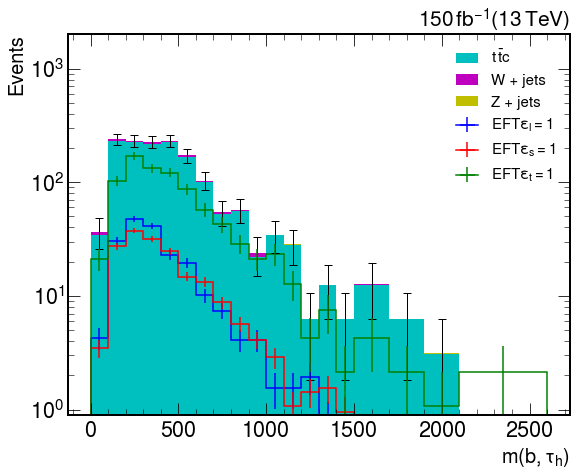

In [27]:
# Invariant Mass between tau, b with cuts

pr.plot_mass1(m_type = r'$m(b,\tau_h)$',
              s1 = Df_s1_cut['Invariant_mass_tau_b'],
              s2 = Df_s2_cut['Invariant_mass_tau_b'],
              s3 = Df_s3_cut['Invariant_mass_tau_b'],
              bg1 = Df_bgttbar_cut['Invariant_mass_tau_b'],
              bg2 = Df_bgw_cut['Invariant_mass_tau_b'],
              bg3 = Df_bgttbar_cut['Invariant_mass_tau_b'],
              Ws = df.Second_Selection,
              labels= labels,
              bines = [i for i in range(0,1500,100)] + [i for i in range(1500, 2200,200)]+[2600])
plt.ylim(0.9,2000);

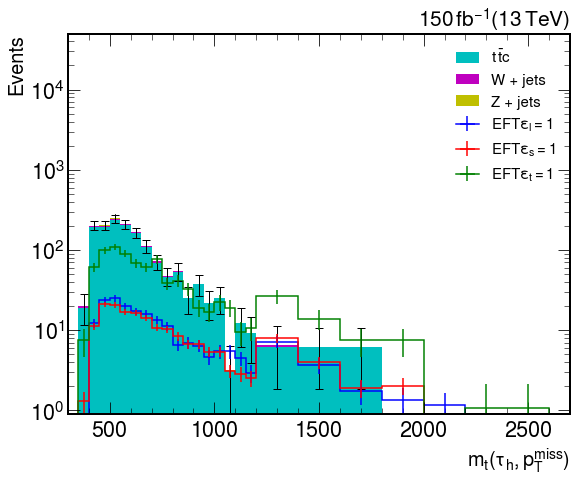

In [38]:
#Transverse mass of tau with cuts

pr.plot_mass1(m_type = r'$m_t(\tau_h, p_T^{miss})$',
              s1 = Df_s1_cut['Transverse_mass_tau'],
              s2 = Df_s2_cut['Transverse_mass_tau'],
              s3 = Df_s3_cut['Transverse_mass_tau'],
              bg1 = Df_bgttbar_cut['Transverse_mass_tau'],
              bg2 = Df_bgw_cut['Transverse_mass_tau'],
              bg3 = Df_bgz_cut['Transverse_mass_tau'],
              Ws = df.Second_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,50)] + [i for i in range(1200, 2600,200)]+[2600])

plt.xlim(300,2700)
plt.ylim(0.9,5e4);



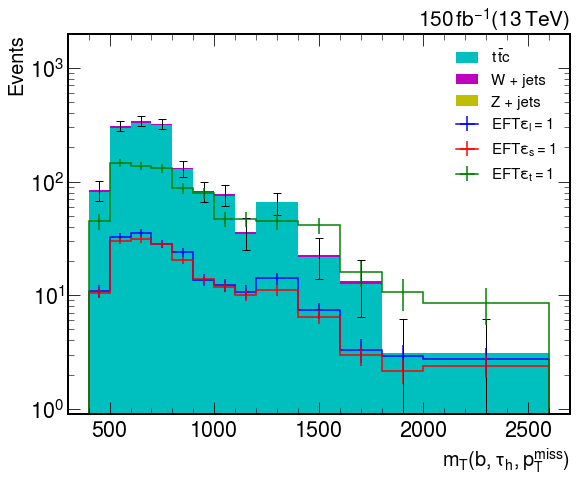

In [40]:
pr.plot_mass1(m_type = r'$m_T(b,\tau_h, p_T^{miss})$',
              s1 = Df_s1_cut['Total_mass'],
              s2 = Df_s2_cut['Total_mass'],
              s3 = Df_s3_cut['Total_mass'],
              bg1 = Df_bgttbar_cut['Total_mass'],
              bg2 = Df_bgz_cut['Total_mass'],
              bg3 = Df_bgz_cut['Total_mass'],
              Ws = df.Second_Selection,
              labels= labels,
              bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])

plt.xlim(300,2700)
plt.ylim(.9,2e3);

In [41]:
df_mt, bines, errs = pr.Binner(m_type = r'$m_t(\tau_h, p_T^{miss})$',
                               s1 = Df_s1_cut['Total_mass'],
                               s2 = Df_s2_cut['Total_mass'],
                               s3 = Df_s3_cut['Total_mass'],
                               bg1 = Df_bgttbar_cut['Total_mass'],
                               bg2 = Df_bgw_cut['Total_mass'],
                               bg3 = Df_bgz_cut['Total_mass'],
                               Ws = df.Second_Selection,
                               labels= labels,
                               bines = [i for i in range(0,1200,100)] + [i for i in range(1200, 2200,200)]+[2600])

In [44]:
df_mt.iloc[1,:]

0      0.00
1      0.00
2      0.00
3      0.00
4     10.56
5     30.12
6     30.96
7     28.20
8     20.28
9     13.80
10    11.76
11    10.08
12    11.04
13     6.48
14     3.00
15     2.16
16     2.40
Name: EFT$\epsilon_s = 1$, dtype: float64

In [45]:
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/EFT_eps_l_Total_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[0,:].values, 
                   errs.iloc[0,:].values)
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/EFT_eps_s_Total_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[1,:].values, 
                   errs.iloc[1,:].values)
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/EFT_eps_t_Total_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[2,:].values, 
                   errs.iloc[2,:].values)
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/ttbar_EFT_cuts_Total_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[3,:].values, 
                   errs.iloc[3,:].values)
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/W_plus_jets_EFT_cuts_Total_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[4,:].values, 
                   errs.iloc[4,:].values)
pr.NpRootConverter("/content/drive/Shareddrives/Rd_Star_Anomally/Analizer/Processed_Datas/Roots_Andres/Z_plus_jets_EFT_cuts_Total_Mass", 
                   "mass_histogram", 
                   bines, 
                   df_mt.iloc[5,:].values, 
                   errs.iloc[5,:].values)